In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'D:\사용자\USER\Desktop\데이터\유사도\유사도3.csv', encoding='cp949')
df = df.drop(columns=['구군'], axis=1)
df



,안전,건강,환경,경제,교육,사회,여가
0,0.7470,0.9220,0.4637,1.0000,0.6839,0.7425,0.6331
1,0.9320,0.6742,0.2865,0.9806,0.5013,0.4608,0.6691
2,0.5537,0.5898,0.5030,0.6915,0.2679,0.4317,0.2817
3,0.5347,0.4794,0.4196,0.6533,0.2464,0.4182,0.3257
4,0.6072,0.6373,0.4992,0.4445,0.4879,0.3519,0.3313
...,...,...,...,...,...,...,...
224,0.7012,0.2036,0.7717,0.1401,0.5064,0.2192,0.6758
225,0.4392,0.2150,0.7998,0.1799,0.8178,0.5717,0.4838
226,0.4268,0.2128,0.9117,0.0373,0.1640,0.0510,0.7900
227,0.4461,0.2537,0.6842,0.4250,0.6468,0.6107,0.6948


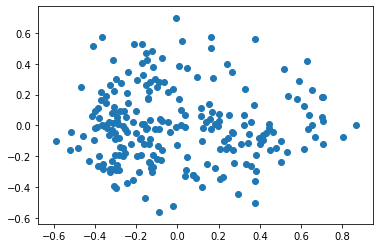

In [7]:
tsne = PCA(n_components=2)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'])
plt.show()

In [8]:
feature=pd.DataFrame(
    {"t1":tsne_results['tsne1'],
     "t2":tsne_results['tsne2']}
     )

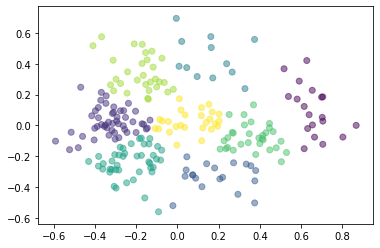

In [18]:
model = KMeans(n_clusters=8,init = 'k-means++', n_init = 10, max_iter = 300,random_state=5) #,algorithm='auto' 
#random_state 5가 최대 0.4059880543975222
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
r = pd.concat([feature,predict],axis=1)
plt.scatter(r['t1'],r['t2'],c=r['predict'],alpha=0.5)



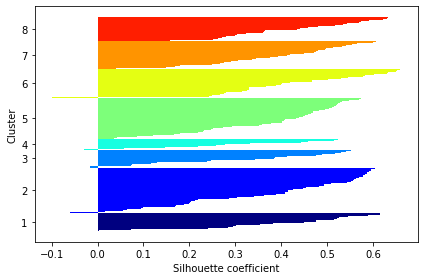

In [19]:
from sklearn.metrics import silhouette_samples
# sklearn의 metrics 모델 안에 silhouette_samples함수로 계산
# k-means++ 알고리즘 
#km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0) 

km=model
X=feature
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] 
# 실루엣 분석
silhouette_vals = silhouette_samples(X, y_km, metric = 'manhattan') 
# 시각화 
y_ax_lower, y_ax_upper = 0, 0
yticks = [] 
for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals)
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout() 
plt.show()



In [20]:
silhouette_avg

0.3827507675949378